# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from src.helpers import *
from glob import glob

Had to perform the following to get `librosa.load()` to work properly after encountering `Error 0x7e: cannot load sndfile.dll`
```sh
pip uninstall soundfile
pip install soundfile
```

# Read Pre-Processed Data

In [3]:
folderpath = glob('../../data/extracted/*')
list(enumerate(folderpath))

[(0, '../../data/extracted\\kino'),
 (1, '../../data/extracted\\korean-ost'),
 (2, '../../data/extracted\\lights-and-motion'),
 (3, '../../data/extracted\\m83'),
 (4, '../../data/extracted\\odesza'),
 (5, '../../data/extracted\\README.md'),
 (6, '../../data/extracted\\sleeping-at-last'),
 (7, '../../data/extracted\\synth-pop'),
 (8, '../../data/extracted\\tony-anderson')]

In [4]:
filepath = glob(glob('../../data/extracted/*')[0] + '/*.pkl*')[9]
filepath

'../../data/extracted\\kino\\Kino - Donau.pkl.pbz2'

In [5]:
feature_vector, feature_repr = AudioRepository.load_one_processed_audio(filepath)
audio = feature_vector.audio
# audio = AudioDataProcessor.load_one('../../data/raw/kino/Kino - Charleston.mp3')
# feature_vector, feature_repr = FeatureVectorProcessor(audio, save_repr=True).process()
print(f'Loaded song: {audio.name}')

Loaded song: Kino - Donau


# Visualising the Data

## Waveform

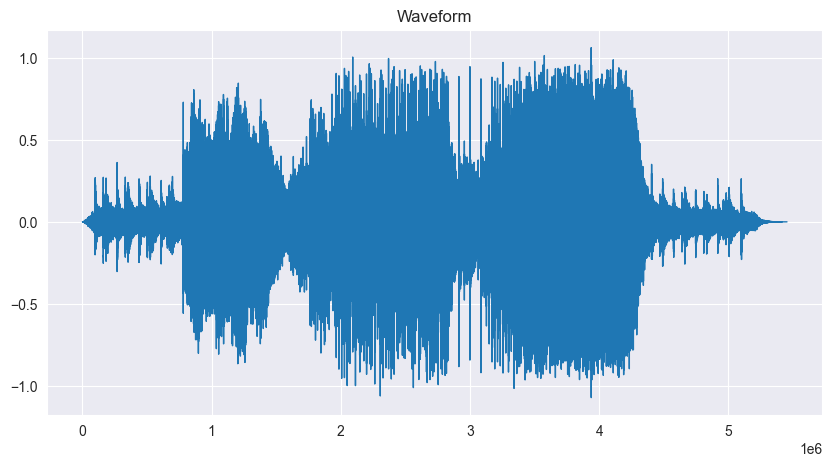

In [6]:
pd.Series(audio.waveform).plot(figsize=(10,5), lw=1, title='Waveform')
plt.show()

## Spectrogram

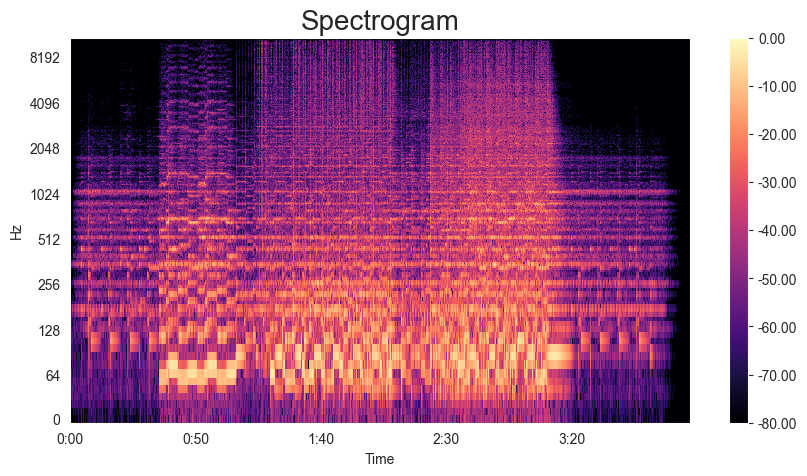

In [7]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

## Mel Spectrogram

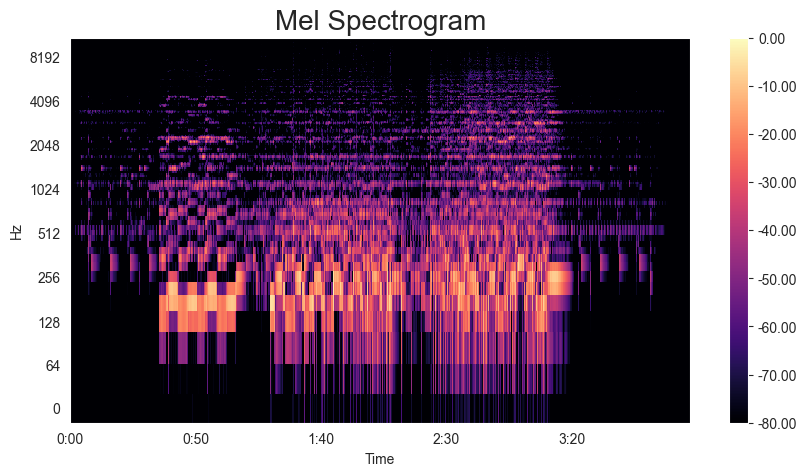

In [8]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.mel_spectrogram, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

# Timbral Texture Feature Extraction

## Spectral Centroid

In [9]:
# Spectral centroid
feature_vector.spectral.spectral_centroid_mean , feature_vector.spectral.spectral_centroid_var

(1406.7489840761957, 511849.9944744232)

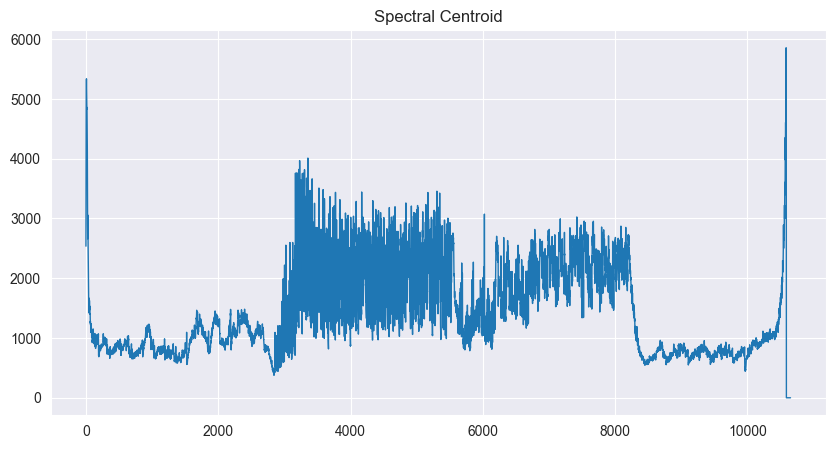

In [10]:
pd.Series(feature_repr.spectral_centroid).plot(figsize=(10,5), lw=1, title='Spectral Centroid')
plt.show()

## Spectral Rolloff

In [11]:
# Spectral rolloff
feature_vector.spectral.spectral_rolloff_mean , feature_vector.spectral.spectral_rolloff_var

(2912.6725167201143, 3797279.6381241325)

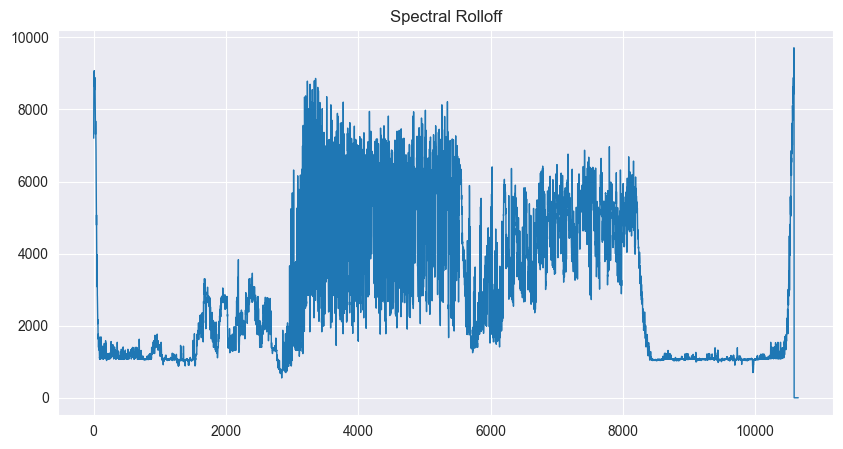

In [12]:
pd.Series(feature_repr.spectral_rolloff).plot(figsize=(10,5), lw=1, title='Spectral Rolloff')
plt.show()

## Spectral Flux

In [13]:
# Spectral flux
# squared distance between normalised magnitudes of successive spectral distributions
feature_vector.spectral.spectral_flux_mean , feature_vector.spectral.spectral_flux_var

(0.8957969, 0.7570743)

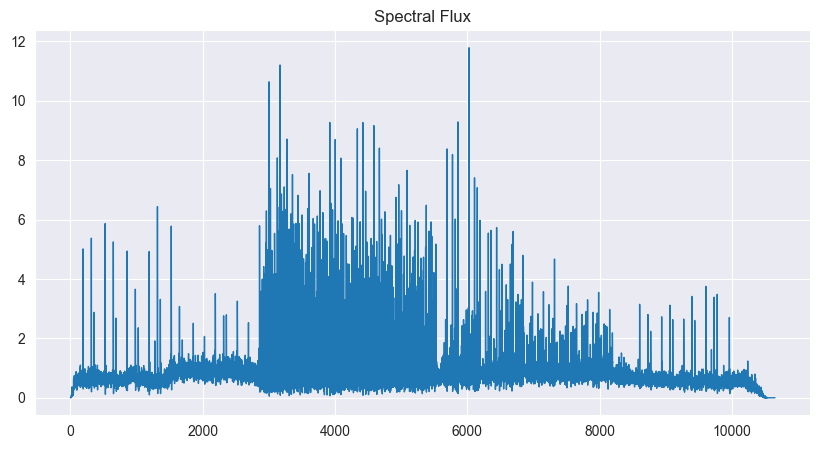

In [14]:
pd.Series(feature_repr.spectral_flux).plot(figsize=(10,5), lw=1, title='Spectral Flux')
plt.show()

## Spectral Flatness

In [15]:
# Spectral flatness
feature_vector.spectral.spectral_flatness_mean, feature_vector.spectral.spectral_flatness_var

(0.012840349, 0.006561002)

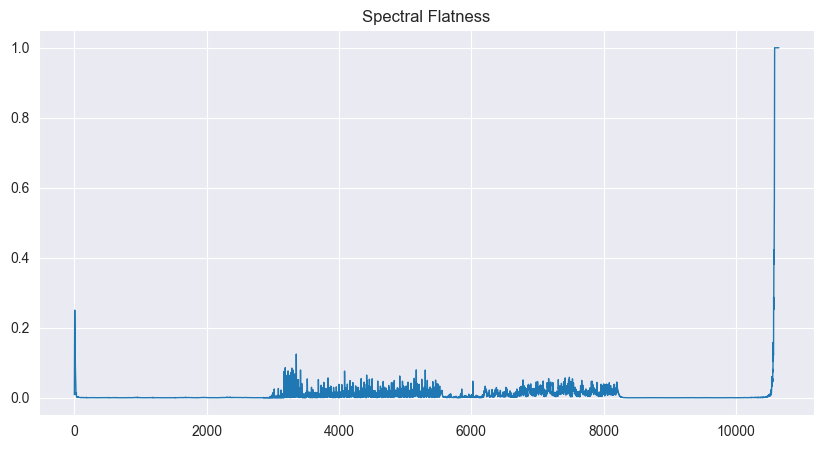

In [16]:
pd.Series(feature_repr.spectral_flatness).plot(figsize=(10,5), lw=1, title='Spectral Flatness')
plt.show()

## Time Domain Zero Crossings

In [17]:
feature_vector.temporal.zero_crossings_mean, feature_vector.temporal.zero_crossings_var

(0.053086353645444985, 0.05026819270207572)

In [18]:
feature_repr.zero_crossings
# might not be exactly the same as Tzanetakis' implementation

array([ True, False, False, ..., False, False, False])

## MFCC Extraction

13 MFCC coefficients, and using only the first 5 excluding DC component

In [ ]:
cepstral_coefficients_df = pd.DataFrame(feature_repr.mfccs).transpose()

In [ ]:
cepstral_coefficients_df.plot(subplots=True, figsize=(10,10))

In [ ]:
cepstral_coefficients_df.mean()

In [ ]:
cepstral_coefficients_df.var()

# Rhythmic Features

Timbral features: DWCH and OSC

Possible to use librosa.effects.hpss to get harmonic, percussive

Chroma Energy Normalized seems like chroma cqt

Can also try computing difference between representations for better temporal accuracy?!

# Chord Trajectory

In [ ]:
# CQT used for harmonic content over STFT for rhythmic content
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.chroma_cqt_sync, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title('Chroma CQT Sync', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(feature_repr.tonnetz, x_axis='time', y_axis='tonnetz', ax=ax)
ax.set_title('Tonnetz (Tonal Centroids)', fontsize=20)
fig.colorbar(img, ax=ax, format='%0.2f')
plt.show()

In [ ]:
sns.heatmap(feature_repr.chord_trajectory, vmin=0, vmax=15)

In [ ]:
# Most likely key signature
feature_vector.harmonic.key_signature

In [ ]:
sns.heatmap(feature_repr.note_trajectory, vmin=0, vmax=5)